# Data Validation

## Imports

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

## Get dataframe

[Inspired by Simple Example Dataframes In pandas (chrisalbon.com)](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_examples/)

In [3]:
from random import choice, randrange, uniform

NAMES =             ['Jason', 'Molly', 'Tina', 'Jake', 'Amy']
SURNAMES =          ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze']
MISSING_VALUES =    [0, None, float("nan"), '', '-', '?', 'N']
LEN = 100

COLUMNS = ['first_name', 'last_name', 'age', 'score', 'empty_values', 'mixed']

df_list = [[
    choice(NAMES), 
    choice(SURNAMES),
    randrange(0, 101, 1),
    round(uniform(0, 10), randrange(0, 4, 1)),
    choice(MISSING_VALUES),
    choice([
        choice(NAMES), 
        choice(SURNAMES), 
        randrange(0, 101, 1), 
        round(uniform(0, 10), randrange(0, 4, 1)),
        choice(MISSING_VALUES)
    ])
] for x in range(0,LEN)]

df = pd.DataFrame(df_list, columns=COLUMNS)

df_original = df.copy()

In [4]:
display(
    df.sample(n=10)
)

,first_name,last_name,age,score,empty_values,mixed
84,Jason,Miller,80,10.000,,Jason
62,Jason,Cooze,49,6.624,?,Molly
0,Jason,Jacobson,98,9.700,-,Milner
13,Tina,Ali,97,2.830,NaN,Jason
52,Molly,Jacobson,83,5.000,N,N
67,Amy,Ali,54,3.825,NaN,Jacobson
24,Molly,Miller,90,8.900,None,0
65,Jason,Milner,60,0.000,?,85
99,Jason,Cooze,77,3.053,?,Miller
90,Tina,Cooze,76,1.445,?,Miller


## Exploration of a feature

In [5]:
def explore_floats(df, feature):
    float_filter = df[feature].apply(lambda x: isinstance(x, float))
    float_num = float_filter.sum()
    float_nan = df[float_filter][feature].isnull().sum()
    float_dec = df[float_filter][feature].notnull().sum()
    row_num = df.shape[0]
    print(f"Float values - number of floats: {float_num} (~ {float_num/row_num*100:.2f}% of rows)",
        f"nan values: {float_nan} (~ {float_nan/float_num*100:.2f}% of floats ~ {float_nan/row_num*100:.2f}% of rows)",
        f"Decimal numbers: {float_dec} (~ {float_dec/float_num*100:.2f}% of floats)\n", sep="\n"
    )
    return None

def explore_strings(df, feature):
    string_filter = df[feature].apply(lambda x: isinstance(x, str))
    string_number = string_filter.sum()
    string_numeric = df[string_filter][feature].str.isnumeric().sum()
    string_oth = (~df[string_filter][feature].str.isnumeric()).sum()
    row_num = df.shape[0]
    print(f"String values - number of string values: {string_number} (~ {string_number/row_num*100:.2f}% of rows)",
            f"Numeric strings: {string_numeric} (~ {string_numeric/string_number*100:.2f}% of strings)",
            f"Other strings: {string_oth} (~ {string_oth/string_number*100:.2f}% of strings)\n", sep="\n"
    )
    print("Number of unique other strings: {}, the strings: {}\n".format(
        df[string_filter][(~df[string_filter][feature].str.isnumeric())][feature].nunique(),
        df[string_filter][(~df[string_filter][feature].str.isnumeric())][feature].unique()
    ))
    return None

def explore_other(df, feature, feature_type):
    none_filter = df[feature].apply(lambda x: isinstance(x, feature_type))
    none_number = none_filter.sum()
    row_num = df.shape[0]
    print("{} values - number: {} (~ {:.2f}% of rows)\n".format(
        feature_type, none_number, none_number/row_num*100
    ))


def explore_feature(df, feature):
    print("Number of rows: {}\nNumber of unique values (nan included): {}\n".format(
        df.shape[0], df[feature].nunique(False)
    ))

    display("Sample of how the values look like:",
        df[feature].sample(n=10)
    )
    # print(f"Type of \"{feature}\" feature: {df.dtypes[feature]}\n")

    value_types = df[feature].apply(lambda x: type(x)).unique()
    print(f"Value types: {value_types}\n")

    for value_type in value_types:
        if (value_type is float):
            explore_floats(df, feature)
        elif (value_type is str):
            explore_strings(df, feature)
        else:
            explore_other(df, feature, value_type)
    return None

In [6]:
df = df_original
feature = "empty_values"

explore_feature(df, feature)


Number of rows: 100
Number of unique values (nan included): 7



'Sample of how the values look like:'

70      -
90      ?
22      ?
61       
81      ?
63       
67    NaN
26      N
38      ?
32       
Name: empty_values, dtype: object

Value types: [<class 'str'> <class 'int'> <class 'NoneType'> <class 'float'>]

String values - number of string values: 62 (~ 62.00% of rows)
Numeric strings: 0 (~ 0.00% of strings)
Other strings: 62 (~ 100.00% of strings)

Number of unique other strings: 4, the strings: ['-' 'N' '?' '']

<class 'int'> values - number: 12 (~ 12.00% of rows)

<class 'NoneType'> values - number: 14 (~ 14.00% of rows)

Float values - number of floats: 12 (~ 12.00% of rows)
nan values: 12 (~ 100.00% of floats ~ 12.00% of rows)
Decimal numbers: 0 (~ 0.00% of floats)



## Outliers detection

[Ways to Detect and Remove the Outliers (Towards Data Science)](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

Text(0.5, 1.0, 'Age distribution')

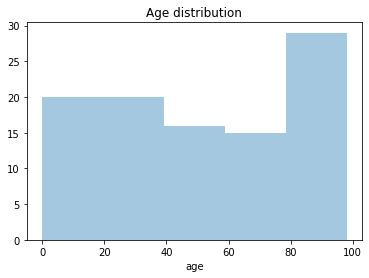

In [22]:
sns.distplot(df["age"], kde=False).set_title("Age distribution")

In [8]:


display("Number of null values: {} ~ {:.2f}%".format(
    df[FEATURE].isnull().sum(), df[FEATURE].isnull().sum() / df.shape[0] * 100
))
display("Number of \"real\" values (not null): {} ~ {:.2f}%".format(
    df[FEATURE].notnull().sum(), df[FEATURE].notnull().sum() / df.shape[0] * 100
))
display("Number of integers: {}".format(
    (df[FEATURE].apply(lambda x: type(x) == int) & df[FEATURE].notnull()).sum()
))
display("Number of string values comprehensible as a number: {} (regex), same as {} (str.isnumeric)".format((
        df[FEATURE].str.match(r"\d+(\.\d+)*\Z")==True).sum(),
        df[FEATURE].str.isnumeric().sum()
))
display(f"""String values that can not be understood as a number, row count: {
        (df[FEATURE].str.isnumeric()==False).sum()
    }""", f"""list of unique values: {
        df[df[FEATURE].apply(lambda x: type(x) == str) & ~(df[FEATURE].str.isnumeric()==True)][FEATURE].unique()}"""
)
display(f"Histogram of \"{FEATURE}\" values:")
fig = px.histogram(df, x=FEATURE)
fig.show()
fig.write_image(f"figures/{FEATURE.lower().replace(' ', '_')}.png")

NameError: name 'FEATURE' is not defined

In [26]:
ser = pd.Series([1,2,3,4], index=["Car", "Bus", "Train", "Plane"])
ser.index[0]

AttributeError: 'numpy.int64' object has no attribute 'index'